**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names
Listed by alphabetical order
- Alexander Zhen
- Athena Wu
- Chaowen Cao
- Takafumi Matsui
- Xinheng Wang

# Research Question

### To what extent does home field advantage affect the winning rate of MLB teams, disregarding other factors not related to the home field, and how does this effect vary across different teams?

By saying "other factors not related to the home field," we are trying to eliminate the effects regarding traveling, such as jet lags or traveling time. Also, the game-specific data, including how many audience members were in the stadium, the weather on the game day, and the park factors.

## Background and Prior Work

  In sports, the concept of home advantage refers to the benefit that the home team is said to have over the visiting team. For instance, if a game takes place in city A, team A from city A is said to have a home advantage when playing against team B from city B. Some believe that home teams have advantages over visiting teams in both the psychological and the physical aspect. Due to physical proximity, audiences of the game are more likely to be fans of the home team.Physically, the visiting team often faces challenges such as adjusting to different time zones, unfamiliar environments, and unique stadium conditions. These factors are believed to contribute to the advantages for home teams, potentially impacting the game’s outcome.

  In a study done by Barry and Barsky<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1), it is shown that home game advantage varies across different sports. Hockey and basketball shows the most significant differences, meaning that the home team has the most significant advantage. On the other hand, home teams of football games has a smaller advantage while home teams of baseball has the least advantage over the visiting team compared to other sports. Furthermore, in this study, the authors reached the conclusion that other factors, such as audience support, play a role in the effectiveness of home game advantages.

  In another study done by Harville and Smith<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2), the effects of home game advantages on college basketball teams were analyzed. The authors concluded that the estimated benefit of playing at home is about 4.68 points, and this advantage is approximately the same across different teams.

  Other studies have shown the effects of home game advantages across different sports. For example, in the study done by Nevill et al.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3), major team sports are shown to be positively impacted by the home game advantage. In American football, of the 2592 games analyzed, the home winning percentage is 57.3%. On the other hand, in ice hockey, the home winning percentage is 59.5%. Soccer shows an even higher home winning rate of 63.9%.

  In a blog post “Is there a home-game advantage in professional sport?”<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4), written by Peter Hersh,  the home-game advantages of MLB (Major League Baseball), NBA (National Basketball Association), NFL (National Football League), and NHL (National Hockey League) over the past decade are analyzed. Based on the analysis, all 4 sports show an advantage when the games are played at home. Overall, MLB shows the smallest advantage compared to other sports. During the year of the pandemic, however, MLB shows the greatest home advantage compared to the other team sports.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Schwartz, Barry, and Stephen F. Barsky. “The Home Advantage.” Social Forces 55, no. 3 (1977): 641–61. https://www.jstor.org/stable/2577461

2. <a name="cite_note-2"></a> [^](#cite_ref-2) Harville, David A., and Michael H. Smith. “The Home-Court Advantage: How Large Is It, and Does It Vary from Team to Team?” The American Statistician 48, no. 1 (1994): 22–28. https://www.jstor.org/stable/2685080

3. <a name="cite_note-3"></a> [^](#cite_ref-3) Nevill, A.M., Holder, R.L. Home Advantage in Sport. Sports Med 28, 221–236 (1999). https://doi.org/10.2165/00007256-199928040-00001

4. <a name="cite_note-4"></a> [^](#cite_ref-4) Hersh P. Is there a home-game advantage in professional sports? (June, 2023).https://community.jmp.com/t5/JMP-Blog/Is-there-a-home-game-advantage-in-professional-sports/ba-p/641566

# Hypothesis


 ### Hypothesis:
 After excluding the factors not related to the home-field advantage, we expect that MLB teams have a far larger winning rate when playing in their home stadium compared to away, with the magnitude of that home-field advantage varying between teams based on factors such as fan support, travel distance, and familiarity with playing conditions.


### Explanations:
 We expect teams to be performing better at home because of the psychological benefits of fan support, less travel fatigue, and field conditions. Also, shorter travel times and no jet lag will help players to perform much better than when playing in a visiting game. This hypothesis is inspired by substantial evidence in sports psychology and player metrics indicating that home-field advantage is one of the main players in team performance.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Win/Lose and Weather Data

In [2]:
data_2017 = {}
data_2018 = {}
data_2019 = {}
data_2021 = {}
data_2022 = {}
data_2023 = {}

# strip the data and add to the corresponding dictionary
with open("data/2017_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2017:
            # If key already exists, append the new value to a list
            data_2017[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2017[key] = [value]


with open("data/2018_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2018:
            # If key already exists, append the new value to a list
            data_2018[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2018[key] = [value]

with open("data/2019_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2019:
            # If key already exists, append the new value to a list
            data_2019[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2019[key] = [value]

with open("data/2021_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2021:
            # If key already exists, append the new value to a list
            data_2021[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2021[key] = [value]

with open("data/2022_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2022:
            # If key already exists, append the new value to a list
            data_2022[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2022[key] = [value]

with open("data/2023_results.txt", 'r') as file:
    # iterate through each line and split key-value pairs
    for line in file:
        key, value = line.strip().split(',', 1) #splits after the first comma
        #print(value)
        # Store the key-value pair in the dictionary
        if key in data_2023:
            # If key already exists, append the new value to a list
            data_2023[key].append(value)
        else:
            # If key is not already in the dictionary, create a new entry with a list
            data_2023[key] = [value]

In [3]:
# analyze data of 2017
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2017["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2017['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

data = pd.read_csv('data/2017gameinfo.csv')
game_date = data['date'].tolist()
winning_team = data['wteam'].tolist()
losing_team = data['lteam'].tolist()

game_date = game_date[:1215]
winning_team = winning_team[:1215]
losing_team = losing_team[:1215]

df = pd.DataFrame({
    'Date': game_date,
    'W_Team': winning_team,
    'L_Team': losing_team,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             65         7                    1                5
1             63         9                    4                5
2             66         7                    9               10
3             69         7                    5                6
4             67         4                    8                3
...          ...       ...                  ...              ...
1210          71         5                   15                5
1211          74         7                    1                0
1212          74         3                    1                8
1213          81         5                    5                1
1214          80         6                    5                9

[1215 rows x 4 columns]


In [4]:
# analyze data of 2018
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2018["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2018['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

df = pd.DataFrame({
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             62         7                    6                0
1             65         4                    2               13
2             65         6                    2                3
3             65         4                    9               13
4             67         8                    7                3
...          ...       ...                  ...              ...
1210          59         6                    2                5
1211          63         7                    5                2
1212          68         0                    5                3
1213          68         0                    4                1
1214          66        16                    1                3

[1215 rows x 4 columns]


In [5]:
# analyze data of 2019
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2019["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2019['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

df = pd.DataFrame({
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             61         6                   11                4
1             63         8                    1                3
2             68         8                    1                5
3             75         6                    2                7
4             77         7                    2                5
...          ...       ...                  ...              ...
1209          68         5                   11                4
1210          72        16                    2                3
1211          68         0                    6                2
1212          64         7                    1                4
1213          57        16                    3                8

[1214 rows x 4 columns]


In [6]:
# analyze data of 2021
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2021["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2021['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

df = pd.DataFrame({
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             81         6                    3                4
1             66        10                   12                8
2             71        10                    3                5
3             72        13                    4                7
4             65        10                    6                7
...          ...       ...                  ...              ...
1210          64        13                    5                6
1211          58         6                    6                2
1212          62         3                    4                6
1213          73        13                    1               10
1214          68         0                    4               12

[1215 rows x 4 columns]


In [7]:
# analyze data of 2022
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2022["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2022['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

df = pd.DataFrame({
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             93         6                    3                1
1             93        10                   13                6
2             72        12                    0                2
3             70         7                    4                1
4             65         9                    2                6
...          ...       ...                  ...              ...
1210          68         0                    5                2
1211          68         0                    8                3
1212          68         0                    0                9
1213          63         8                    0               10
1214          68         0                    3                6

[1215 rows x 4 columns]


In [ ]:
# analyze data of 2023
temp_data = []
windspeed_data = []
all_visiting_score = [] #stores the score of all visiting teams (i.e. scores throughout the year)
all_home_score = []
for entry in data_2023["info"]:
    if entry.startswith('temp,'):
        temp_value = entry.split(',')[1] #get the value behind ,
        #print(temp_value)
        temp_data.append(temp_value)
    if entry.startswith('windspeed'):
        windspeed_value = entry.split(',')[1]
        #print(windspeed_value)
        windspeed_data.append(windspeed_value)
for entry in data_2023['line']:
    if entry[0] == '0': #data for visiting team
        visiting_score = 0
        visiting_score_list = entry[2:] # start from 2 because the 0th element indicates whether it is a visiting team or a home team and the 1st element is a comma
        visiting_score_list = visiting_score_list.split(",") # creates a list of strings of scores
        for i in visiting_score_list:
            visiting_score += int(i) # convert each string score to int and sum up to generate total score
        all_visiting_score.append(visiting_score)
    else: #data for home team
        home_score = 0
        home_score_list = entry[2:]
        home_score_list = home_score_list.split(",")
        for i in home_score_list:
            home_score += int(i)
        #print(home_score)
        all_home_score.append(home_score)

df = pd.DataFrame({
    'Temperature': temp_data,
    'Windspeed': windspeed_data,
    'Visiting Team Score': all_visiting_score,
    'Home Team Score': all_home_score
})

print(df)

     Temperature Windspeed  Visiting Team Score  Home Team Score
0             64         6                    4                3
1             63         8                    5                9
2             72         5                   12               11
3             66         6                    6                4
4             63         8                    0                2
...          ...       ...                  ...              ...
1210          68         0                    6                0
1211          63        16                    0                6
1212          64         8                    4               11
1213          68         7                    7                5
1214          79         6                   12                8

[1215 rows x 4 columns]


## Injury Report Data and Baseball Reference Game Logs

In [8]:
injury_report = pd.read_csv('data/Injury_report.csv')
game_log_2017 = pd.read_csv('data/processed_2017.csv')
game_log_2018 = pd.read_csv('data/processed_2018.csv')
game_log_2019 = pd.read_csv('data/processed_2019.csv')
game_log_2021 = pd.read_csv('data/processed_2021.csv')
game_log_2022 = pd.read_csv('data/processed_2022.csv')
game_log_2023 = pd.read_csv('data/processed_2023.csv')

In [9]:
injury_report_cleaned = injury_report.copy()

injury_report_cleaned.dropna(subset=['Date', 'Team'], inplace=True)

injury_report_cleaned = injury_report_cleaned.fillna({'Acquired': 'Unknown', 'Relinquished': 'Unknown'})

injury_report_cleaned['Injury Type'] = injury_report_cleaned['Notes'].str.extract(r'with (.*?)(?:\srecovering|\.|$)')

injury_report_cleaned['Off IL Date'] = injury_report_cleaned['Notes'].str.extract(r'returning on (\d{4}-\d{2}-\d{2})')

pre_covid_logs_cleaned = []
post_covid_logs_cleaned = []

for game_log in [game_log_2017, game_log_2018, game_log_2019]:
    game_log_cleaned = game_log.copy()


    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    pre_covid_logs_cleaned.append(game_log_cleaned)

for game_log in [game_log_2021, game_log_2022, game_log_2023]:
    game_log_cleaned = game_log.copy()

    columns_with_urls = ['Date', 'Opp', 'Win', 'Loss', 'Save', 'Unnamed: 2']
    for col in columns_with_urls:
        if col in game_log_cleaned.columns:
            game_log_cleaned[col] = game_log_cleaned[col].str.replace(r'\(.*?\)', '', regex=True).str.strip()

    columns_to_drop = ['Unnamed: 2', 'Unnamed: 4', 'Orig. Scheduled']
    game_log_cleaned.drop(columns=[col for col in columns_to_drop if col in game_log_cleaned.columns], inplace=True)

    game_log_cleaned['Streak'] = game_log_cleaned['Streak'].str.replace(r'[^+-]', '', regex=True)

    game_log_cleaned = game_log_cleaned.fillna({'W/L': 'Unknown', 'R': 0, 'RA': 0, 'Attendance': 0})

    post_covid_logs_cleaned.append(game_log_cleaned)

combined_pre_covid_logs = pd.concat(pre_covid_logs_cleaned, ignore_index=True)
combined_post_covid_logs = pd.concat(post_covid_logs_cleaned, ignore_index=True)


In [10]:
print("Cleaned Injury Report Dataset:")
print(injury_report_cleaned.head())
print("\nCombined Pre-COVID Game Logs Dataset (2017-2019):")
print(combined_pre_covid_logs.head())
print("\nCombined Post-COVID Game Logs Dataset (2021-2023):")
print(combined_post_covid_logs.head())

Cleaned Injury Report Dataset:
         Date       Team Acquired      Relinquished  \
0  2017-02-14     Braves  Unknown  • Jacob Lindgren   
1  2017-02-14  Nationals  Unknown   • Aaron Barrett   
2  2017-02-14    Rangers  Unknown    • Jake Diekman   
3  2017-02-14    Rangers  Unknown  • Prince Fielder   
4  2017-02-14       Reds  Unknown    • Homer Bailey   

                                               Notes              Injury Type  \
0  placed on 60-day DL recovering from ligament r...                      NaN   
1  placed on 60-day DL recovering from ligament r...                      NaN   
2  placed on 60-day DL recovering from surgery to...                      NaN   
3   placed on 60-day DL with herniated discs in neck  herniated discs in neck   
4  transferred to 60-day DL recovering from ligam...                      NaN   

  Off IL Date  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Combined Pre-COVID Game Logs Dataset (2017-2019):
  Gm

## Ballpark Factors

Ballpark factors are data provided by Google Cloud which show the biasness of the ballpark. Google Cloud explains, "Statcast park effects show the observed effect of each displayed stat based on the events in the selected park. Each number is set so that “100” is average for that metric, and the park-specific number is generated by looking at each batter and pitcher, controlled by handedness, and comparing the frequency of that metric in the selected park compared to the performance of those players in other parks.
For example, the 135 HR mark for 2018-2020 at Great American Ball Park does not mean the Reds hit 35% more home runs at their home park. It means for batters and pitchers who played both at GABP and elsewhere, 35% more home runs were observed at GABP."

In [11]:
rawdata_dic = {}
for year in ['2017-2019','2021-2023']:
    for dn in ['day','night']:
        data_name = f"park_factor_{year}_{dn}"
        with open(f"data/park_factor_{year}_{dn}.html","r") as f:
            rawdata_dic[data_name] = f.read()

In [ ]:
column_list = []
row_dict = {}
for key,value in rawdata_dic.items():
    soup = BeautifulSoup(value, "html.parser")
    columns = soup.find(class_ = "tr-component-row")
    columns = columns.find_all('th')
    for column in columns:
        column_list.append(column.get_text(strip=True))
    rows = soup.find_all(class_ = 'default-table-row')
    row_list = []
    for row in rows:
        lst = []
        data = row.find_all('td')
        for datum in data:
            lst.append(datum.get_text(strip=True))
        row_list.append(lst)
    row_dict[key] = row_list

In [12]:
column_list = list(dict.fromkeys(column_list))

NameError: name 'column_list' is not defined

In [ ]:
df_dict = {}
for key,value in row_dict.items():
    df_dict[key] = pd.DataFrame(columns = column_list, data= value)

In [ ]:
park_factor_2017_2019_day = df_dict['park_factor_2017-2019_day']
park_factor_2017_2019_night = df_dict['park_factor_2017-2019_night']
park_factor_2021_2023_day = df_dict['park_factor_2021-2023_day']
park_factor_2021_2023_night = df_dict['park_factor_2021-2023_night']

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

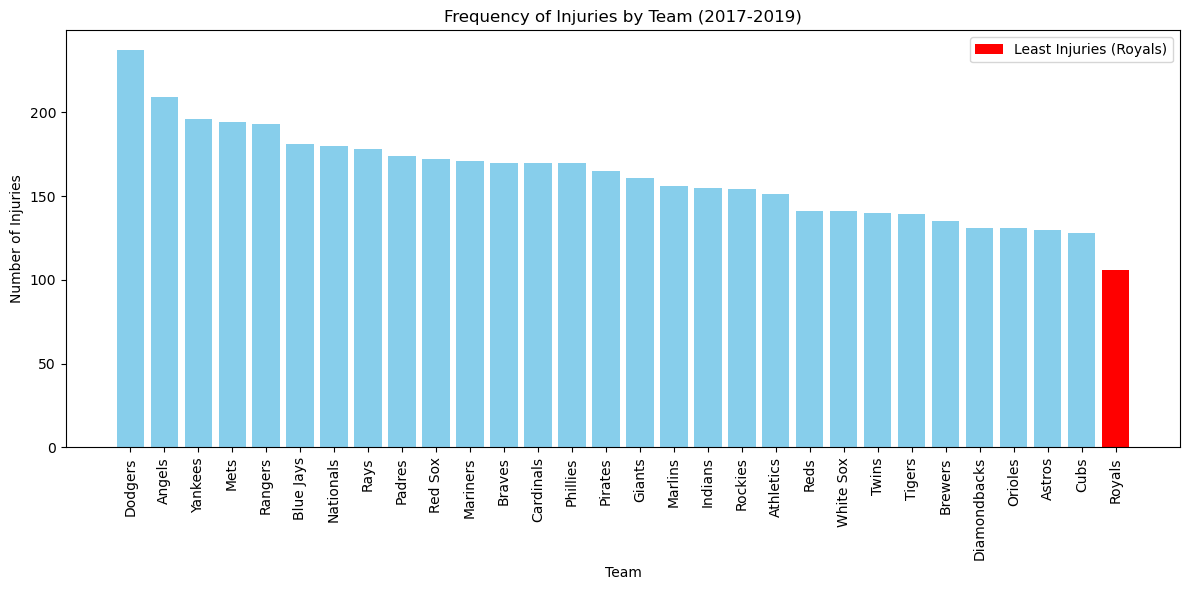

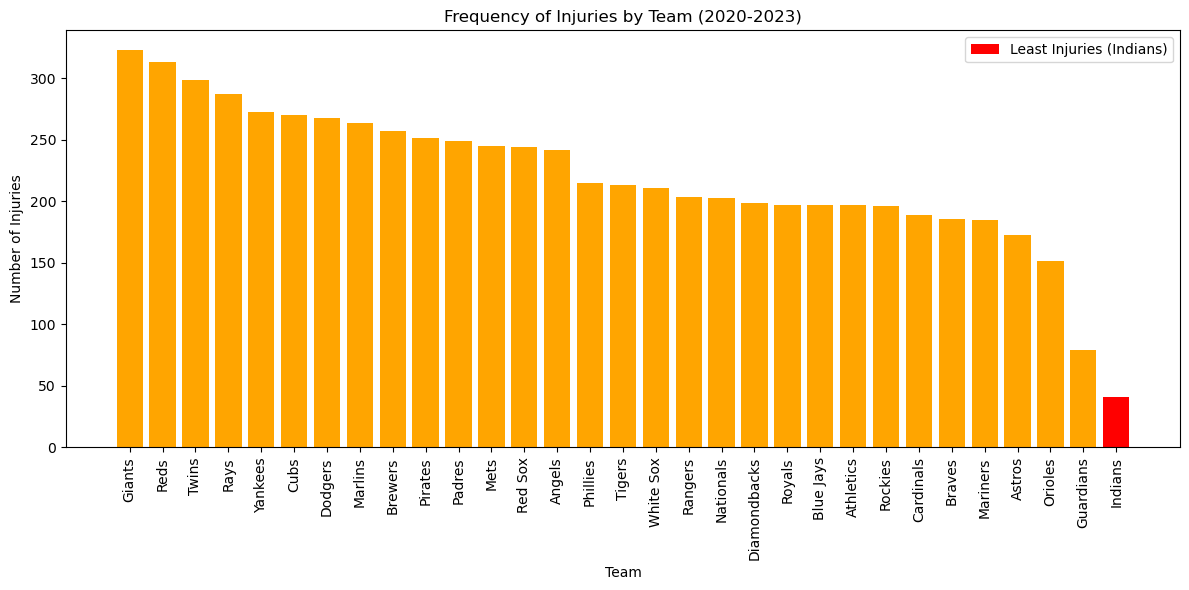

In [22]:
# Read the injury report data
file_path = 'C:\\github\\Group071-FA24\\data\\Injury_report.csv'
injury_df = pd.read_csv(file_path)

# Ensure 'Date' column exists and convert it to datetime format, then extract the year
if 'Date' in injury_df.columns:
    injury_df['Date'] = pd.to_datetime(injury_df['Date'], errors='coerce')
    injury_df['Year'] = injury_df['Date'].dt.year
else:
    print("The CSV file must contain a 'Date' column.")

# Check if 'Team' column exists
if 'Team' in injury_df.columns:
    # Calculate the number of injuries for each team for the years 2017-2019
    injury_2017_2019 = injury_df[(injury_df['Year'] >= 2017) & (injury_df['Year'] <= 2019)]
    team_injury_counts_2017_2019 = injury_2017_2019['Team'].value_counts()

    # Calculate the number of injuries for each team for the years 2020-2023
    injury_2020_2023 = injury_df[(injury_df['Year'] >= 2020) & (injury_df['Year'] <= 2023)]
    team_injury_counts_2020_2023 = injury_2020_2023['Team'].value_counts()

    # Plot the frequency of injuries for each team for 2017-2019
    plt.figure(figsize=(12, 6))
    plt.bar(team_injury_counts_2017_2019.index, team_injury_counts_2017_2019.values, color='skyblue')
    plt.xlabel('Team')
    plt.ylabel('Number of Injuries')
    plt.title('Frequency of Injuries by Team (2017-2019)')
    plt.xticks(rotation=90)

    # Highlight the team with the least number of injuries
    team_with_least_injuries_2017_2019 = team_injury_counts_2017_2019.idxmin()
    least_injury_count_2017_2019 = team_injury_counts_2017_2019.min()
    plt.bar(team_with_least_injuries_2017_2019, least_injury_count_2017_2019, color='red', label=f'Least Injuries ({team_with_least_injuries_2017_2019})')

    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot the frequency of injuries for each team for 2020-2023
    plt.figure(figsize=(12, 6))
    plt.bar(team_injury_counts_2020_2023.index, team_injury_counts_2020_2023.values, color='orange')
    plt.xlabel('Team')
    plt.ylabel('Number of Injuries')
    plt.title('Frequency of Injuries by Team (2020-2023)')
    plt.xticks(rotation=90)

    # Highlight the team with the least number of injuries
    team_with_least_injuries_2020_2023 = team_injury_counts_2020_2023.idxmin()
    least_injury_count_2020_2023 = team_injury_counts_2020_2023.min()
    plt.bar(team_with_least_injuries_2020_2023, least_injury_count_2020_2023, color='red', label=f'Least Injuries ({team_with_least_injuries_2020_2023})')

    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("The CSV file must contain a 'Team' column.")

In [24]:
if 'Date' in injury_df.columns:
    injury_df['Date'] = pd.to_datetime(injury_df['Date'], errors='coerce')
    injury_df['Year'] = injury_df['Date'].dt.year
else:
    print("The CSV file must contain a 'Date' column.")

# Calculate the total number of injuries for each year
if 'Year' in injury_df.columns:
    yearly_injury_count = injury_df.groupby('Year').size().reset_index(name='Total Injury Count')

    # Print the total number of injuries for each year
    print(yearly_injury_count)
else:
    print("The CSV file must contain a 'Year' column.")

   Year  Total Injury Count
0  2017                1564
1  2018                1656
2  2019                1639
3  2021                2699
4  2022                2190
5  2023                1934


In [26]:
# Create an empty list to store data frames for each year
dfs = []

# Iterate through the yearly data dictionaries, convert them to data frames, and add to the list
for year, data in [('2017', data_2017), ('2018', data_2018), ('2019', data_2019), ('2021', data_2021), ('2022', data_2022), ('2023', data_2023)]:
    # Extract visiting team score and home team score
    visiting_scores = []
    home_scores = []

    # Extract data for each year
    for entry in data['line']:
        if entry[0] == '0':  # Visiting team
            visiting_score = 0
            visiting_score_list = entry[2:].split(",")  # Start from the 2nd character (0th indicates visiting/home team)
            for score in visiting_score_list:
                visiting_score += int(score)
            visiting_scores.append(visiting_score)
        else:  # Home team
            home_score = 0
            home_score_list = entry[2:].split(",")
            for score in home_score_list:
                home_score += int(score)
            home_scores.append(home_score)

    # Ensure both lists have the same length
    min_length = min(len(visiting_scores), len(home_scores))
    visiting_scores = visiting_scores[:min_length]
    home_scores = home_scores[:min_length]

    # Create a data frame
    df = pd.DataFrame({
        'Year': [year] * min_length,
        'Visiting Team Score': visiting_scores,
        'Home Team Score': home_scores
    })

    # Add to the list of data frames
    dfs.append(df)

# Concatenate all yearly data frames into one combined data frame
combined_df = pd.concat(dfs, ignore_index=True)

# Print the combined data frame
print(combined_df)

# Add a column to determine the winner
combined_df['Home Win'] = combined_df['Home Team Score'] > combined_df['Visiting Team Score']
combined_df['Visiting Win'] = combined_df['Visiting Team Score'] > combined_df['Home Team Score']

# Calculate the number of wins and total games for each year
yearly_stats = combined_df.groupby('Year').agg(
    total_games=('Home Win', 'size'),
    home_wins=('Home Win', 'sum'),
    visiting_wins=('Visiting Win', 'sum')
).reset_index()

# Calculate home and visiting win rates
yearly_stats['Home Win Rate'] = yearly_stats['home_wins'] / yearly_stats['total_games']
yearly_stats['Visiting Win Rate'] = yearly_stats['visiting_wins'] / yearly_stats['total_games']

# Print win rates for each year
print(yearly_stats)

      Year  Visiting Team Score  Home Team Score
0     2017                    1                5
1     2017                    4                5
2     2017                    9               10
3     2017                    5                6
4     2017                    8                3
...    ...                  ...              ...
7284  2023                    6                0
7285  2023                    0                6
7286  2023                    4               11
7287  2023                    7                5
7288  2023                   12                8

[7289 rows x 3 columns]
   Year  total_games  home_wins  visiting_wins  Home Win Rate  \
0  2017         1215        653            562       0.537449   
1  2018         1215        644            571       0.530041   
2  2019         1214        620            594       0.510708   
3  2021         1215        649            566       0.534156   
4  2022         1215        651            564       0.535802 

   Year  total_games  home_wins  visiting_wins  Home Win Rate  \
0  2017         1215        653            562       0.537449   
1  2018         1215        644            571       0.530041   
2  2019         1214        620            594       0.510708   
3  2021         1215        649            566       0.534156   
4  2022         1215        651            564       0.535802   
5  2023         1215        614            601       0.505350   

   Visiting Win Rate  Total Injury Count  
0           0.462551                1564  
1           0.469959                1656  
2           0.489292                1639  
3           0.465844                2699  
4           0.464198                2190  
5           0.494650                1934  


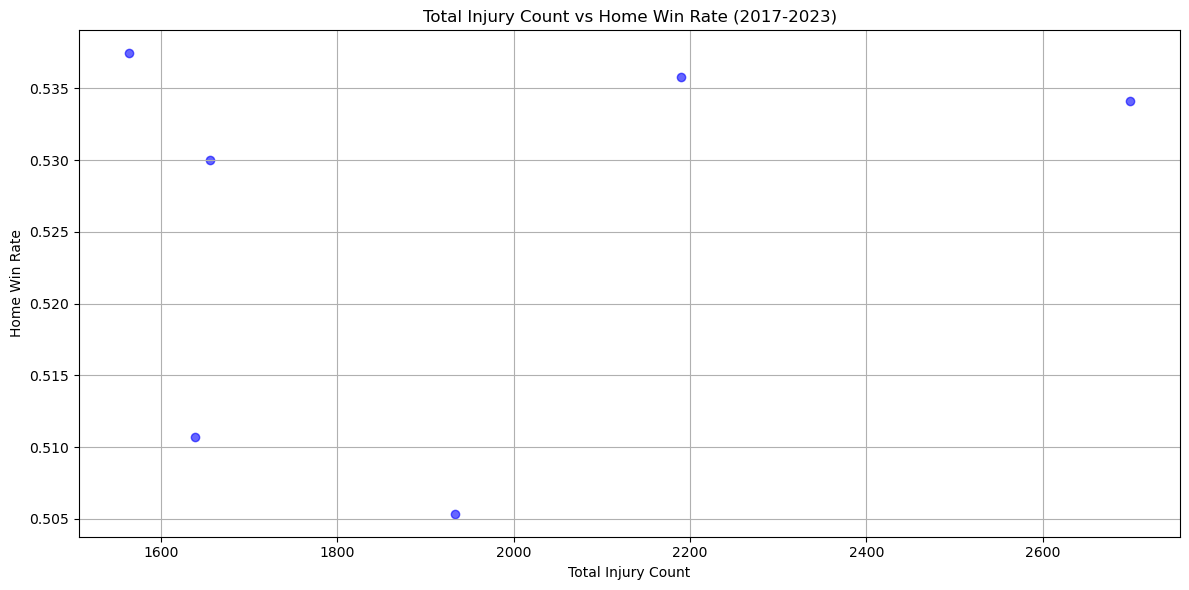

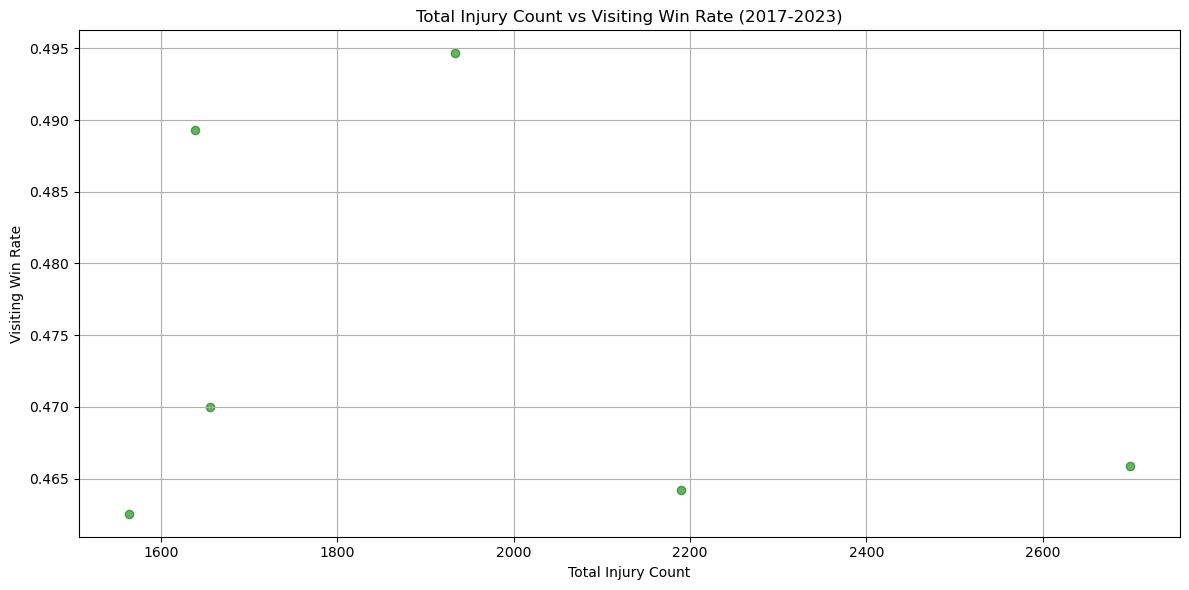

In [28]:
# Convert 'Year' columns to integers for merging
yearly_stats['Year'] = yearly_stats['Year'].astype(int)
yearly_injury_count['Year'] = yearly_injury_count['Year'].astype(int)

# Merge yearly_stats and yearly_injury_count
combined_stats = pd.merge(yearly_stats, yearly_injury_count, on='Year', how='inner')

# Print the merged dataframe to check
print(combined_stats)

# Plot scatter plot: Total Injury Count vs Home Win Rate
plt.figure(figsize=(12, 6))
plt.scatter(combined_stats['Total Injury Count'], combined_stats['Home Win Rate'], color='blue', alpha=0.6)
plt.xlabel('Total Injury Count')
plt.ylabel('Home Win Rate')
plt.title('Total Injury Count vs Home Win Rate (2017-2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot scatter plot: Total Injury Count vs Visiting Win Rate
plt.figure(figsize=(12, 6))
plt.scatter(combined_stats['Total Injury Count'], combined_stats['Visiting Win Rate'], color='green', alpha=0.6)
plt.xlabel('Total Injury Count')
plt.ylabel('Visiting Win Rate')
plt.title('Total Injury Count vs Visiting Win Rate (2017-2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- The primary data sources would include available MLB statistics (from MLB or 3rd-party), player performance metrics, and environmental factors like weather and travel distances. While this form of data is publicly accessible, there could be some bias in the overrepresentation of certain teams, seasons, or players. The privacy issues would be minimal, as this data involves professional athletes and publicly held games; therefore, much of the statistics and game information would be in the public domain. Terms of use issues would be that some data sources might have restrictions on how their data can be used, as it might violate some of their terms of service if not done properly.

- There are potential biases, like sampling biases, if the dataset doesn't cover all the teams equally or doesn't include certain seasons or games. Different methods of data collection would create some inaccuracies, like, for example, the weather. Weather data collected from far from the station might not accurately reflect the weather conditions of the game. Also, with the distribution of fans, more popular teams would have a larger market size and budget. Allowing these teams to afford better facilities, hire better players, trainers, and travel accommodations.

- To address the confounding variables and any biases they might introduce, we plan to identify and include variables such as weather conditions, player fatigue and injury, team dynamics, and historical performance to control their impact on the analysis. Aligning and keeping our data collection procedures the same across the board in order to minimize any inconsistencies, as well as sensitivity analyses, will further allow us to see if our results change with different assumptions about the confounding variables. In order for organization, we would document and report our procedures with each other and on the notebook; this will ensure transparency on how these confounding variables are being handled and would assist us in discussing their potential impact for our end result.

- Before analysis, perform a proper check on all datasets to see if we missed any values, outliers, or inconsistencies. Ensure that all teams, players, team compositions, and seasons are properly represented in the data. Sourcing data from credible and reliable sources to ensure accurate data. During analysis, we will monitor for any signs of bias, like skewness and adjust any of our models to account for any biases we see or confounding variables. Afterwards, we would cross-reference our findings with our external data and studies to confirm our findings.

- If this data were to be used beyond its intended scope, it might violate some sources’ terms of service, which would lead to some legal and ethical issues. If data steers towards the need to include players’ health, some HIPAA violations would be possible. When analyzing fan attitudes, we need to be careful of perpetuating stereotypes or offending certain groups. We will be using appropriate methods to account for any missing information, gathered properly through data sources that we’ve carefully read and followed their terms of service. If there are restrictions, we will look for any alternative data sources that are open to the public and free to use. When comparing our data, to ensure its accuracy, we use reliable sources to check, as well as thoroughly clean the data to fix any errors or inconsistencies. Present our findings without biases and openly discuss any limitations or potential biases in our studies.




# Team Expectations

* Commitment to Timely Contribution:
Everyone should adhere to deadlines set by the group to ensure that work progresses smoothly.
If someone is unable to complete a task on time, they should inform the team as soon as possible so that adjustments can be made.

* Communication Protocols:
The team will primarily communicate through  Discord.
We will meet weekly on Monday at Geisel to assign new tasks, and to address any concerns.
Everyone in the group are expected to check the Discord daily. If there's a post on Discord, at least a discord-emoji-reaction is expected to make sure everyone read the post. Constructive responses are appreciated.

* Respectful Conflict Resolution:
If conflicts arise, the team will discuss them during scheduled meetings calmly and respectfully. The aim will always be to understand one another’s perspectives and find a solution that works for everyone.

* Task Delegation and Roles:
Tasks will be assigned based on each member and everyone is encouraged to participate in decision-making to distribute responsibilities equitably.
Team members are encouraged to assist each other when someone needs help. Collaboration is key to the project’s success.

* Work Quality and Effort:
Everyone should feel comfortable offering constructive feedback and asking questions whenever clarification is needed.

* Accountability:
Each member will be responsible for the tasks they are assigned. If unexpected situations arise, make sure to mention it on Discord as soon as possible. Remember that everyone in the group are UCSD students and are busy having their assignments/exams as well as you are.

* Inclusiveness and Respect:
All opinions and ideas will be treated with respect. Contributions from every team member are valuable, and everyone will be encouraged to speak up during discussions.

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| Every Monday  |  12 PM | Read the progress made during Last Week  | One-hour weekly meeting at Geisel to share the progress and plans |
| 10/30 |  12 PM |  Read what we need for project proposal | Discuss and make progress to submit the project proposal. |
| 10/30  | Deadline  |  Project Proposal | Finish and push the final data to Github by the end of the day  |
|11/4| 12 PM | Read the DataCheckPoint file to understand what we need for the submission | Discuss who will do which part and make the schedule concrete. |
| 11/11 | 12 PM | Read the progress made by the group until Sunday | Discuss if there's any problem and make sure we can submit them on Wednesday. |
| 11/13  | Deadline  | Checkpoint #1: Data | Finish and push the final data to Github by the end of the day  |
| 11/18 | 12 PM | Read the progress made by the group until Sunday | Discuss who will do which part and make the schedule concrete. |
| 11/25 | 12 PM | Read the progress made by the group until Sunday | Discuss if there's any problem and make sure we can submit them on Wednesday. |
| 11/27  | Deadline  | Checkpoint #2: EDA | Finish and push the final data to Github by the end of the day |
| 12/11 | Deadline | Final submission | |